<a href="https://colab.research.google.com/github/LoguPrasanth-hub/Anomaly-Detection/blob/main/Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessaries libraries
import pandas as pd
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Importing the Datasets
df=pd.read_excel("data.xlsx")
df.head()

/usr/local/lib/python3.10/dist-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
# Checking the null values
df.isnull().sum()

,0
time,0
Cyclone_Inlet_Gas_Temp,0
Cyclone_Material_Temp,0
Cyclone_Outlet_Gas_draft,0
Cyclone_cone_draft,0
Cyclone_Gas_Outlet_Temp,0
Cyclone_Inlet_Draft,0


In [ ]:
# describing the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    377719 non-null  object        
 2   Cyclone_Material_Temp     377719 non-null  object        
 3   Cyclone_Outlet_Gas_draft  377719 non-null  object        
 4   Cyclone_cone_draft        377719 non-null  object        
 5   Cyclone_Gas_Outlet_Temp   377719 non-null  object        
 6   Cyclone_Inlet_Draft       377719 non-null  object        
dtypes: datetime64[ns](1), object(6)
memory usage: 20.2+ MB


the data in the column of Datasets are in 'object' types.

In [ ]:
# Creating a list of columns have to converted into numeric type
numeric_column=['Cyclone_Inlet_Gas_Temp',
                'Cyclone_Material_Temp',
                'Cyclone_Outlet_Gas_draft',
                'Cyclone_cone_draft',
                'Cyclone_Gas_Outlet_Temp',
                'Cyclone_Inlet_Draft']
numeric_column

['Cyclone_Inlet_Gas_Temp',
 'Cyclone_Material_Temp',
 'Cyclone_Outlet_Gas_draft',
 'Cyclone_cone_draft',
 'Cyclone_Gas_Outlet_Temp',
 'Cyclone_Inlet_Draft']

In [ ]:
# Converting to Numeric type
df[numeric_column]=df[numeric_column].apply(pd.to_numeric, errors='coerce')

# Checking the datasets
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377719 entries, 0 to 377718
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   time                      377719 non-null  datetime64[ns]
 1   Cyclone_Inlet_Gas_Temp    376399 non-null  float64       
 2   Cyclone_Material_Temp     376128 non-null  float64       
 3   Cyclone_Outlet_Gas_draft  376398 non-null  float64       
 4   Cyclone_cone_draft        376399 non-null  float64       
 5   Cyclone_Gas_Outlet_Temp   376398 non-null  float64       
 6   Cyclone_Inlet_Draft       376397 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 20.2 MB


In [ ]:
# Checking the null values again
df.isnull().sum()

,0
time,0
Cyclone_Inlet_Gas_Temp,1320
Cyclone_Material_Temp,1591
Cyclone_Outlet_Gas_draft,1321
Cyclone_cone_draft,1320
Cyclone_Gas_Outlet_Temp,1321
Cyclone_Inlet_Draft,1322


Dataset contains lot of null values. It also has lot of data, so droping the null values is a appropriate choice.

In [ ]:
# Droping the null values
df.dropna(inplace=True)
df.shape

(376124, 7)

In [ ]:
# Setting datetime type column as index
df.set_index('time',inplace=True)
df.head()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
time,,,,,,
2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [ ]:
# Describing the Datasets
df.describe()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000,376124.000000
mean,727.387946,750.828429,-177.830733,-164.582678,715.798475,-141.309826
std,328.634044,350.922335,99.138694,90.096403,325.316433,77.609444
min,0.000000,-185.000000,-456.660000,-459.310000,13.790000,-396.370000
25%,856.280000,867.660000,-247.190000,-226.770000,802.040000,-193.510000
50%,882.380000,913.360000,-215.260000,-198.570000,871.530000,-169.460000
75%,901.120000,943.660000,-170.150000,-143.680000,899.300000,-136.310000
max,1157.630000,1375.000000,40.270000,488.860000,1375.000000,41.640000


In [ ]:
# Checking the Correlation
df.corr()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
Cyclone_Inlet_Gas_Temp,1.000000,0.964728,-0.903024,-0.899635,0.990967,-0.901805
Cyclone_Material_Temp,0.964728,1.000000,-0.880627,-0.877590,0.957382,-0.879364
Cyclone_Outlet_Gas_draft,-0.903024,-0.880627,1.000000,0.968423,-0.898723,0.995450
Cyclone_cone_draft,-0.899635,-0.877590,0.968423,1.000000,-0.893088,0.969452
Cyclone_Gas_Outlet_Temp,0.990967,0.957382,-0.898723,-0.893088,1.000000,-0.898505
Cyclone_Inlet_Draft,-0.901805,-0.879364,0.995450,0.969452,-0.898505,1.000000


In [ ]:
# Model the IsolationForest with different parameters
contaminations=[0.01,0.05,0.1,'auto']
numbers=[1,2,3,4]

for cont,num in zip(contaminations,numbers):
  model=IsolationForest(contamination=cont,random_state=42)
  model.fit(df)                                                   # Fit the model
  df['anomaly'] = model.predict(df)                               # Predict the model
  exec(f"df{num}=df")                                             # Creating the new dataset with different name
  anomalies = df[df['anomaly'] == -1]                             # Extracting the Anomalies
  exec(f"anomaly {num} = anomalies")                              # Creating the new dataset with different Anomalies extracted
  df=df.drop('anomaly',axis=1)                                    # Droping the 'anomaly' column
  del anomalies                                                   # Deleting the anomalies

In [ ]:
# Shape of the Anomalies
anomaly4.shape, anomaly3.shape, anomaly2.shape, anomaly1.shape

((51556, 7), (37613, 7), (18807, 7), (3762, 7))

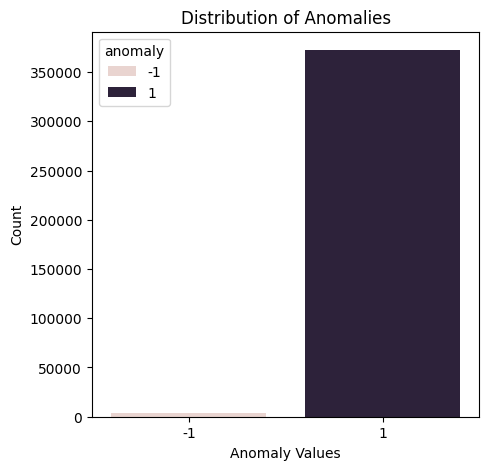

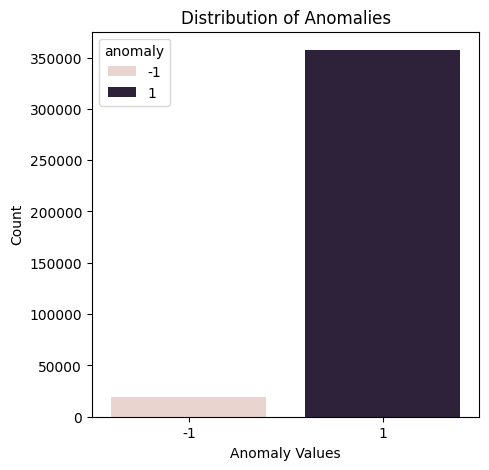

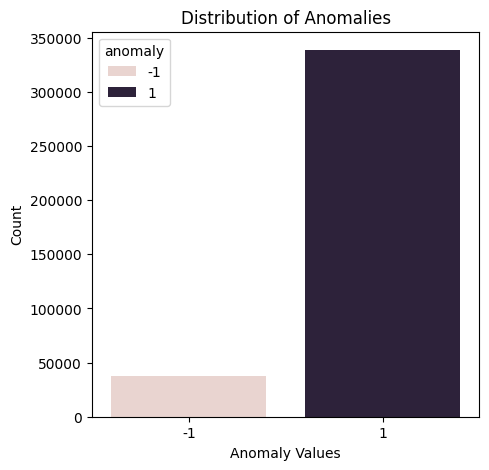

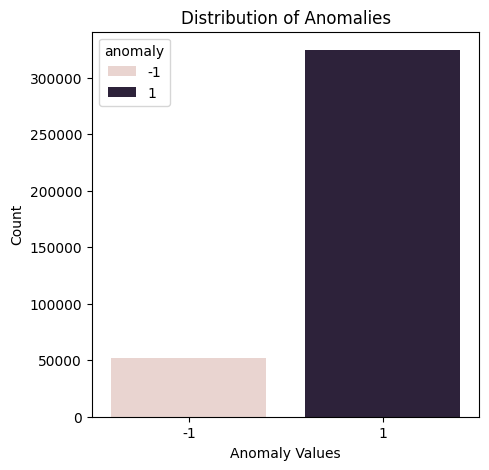

In [ ]:
dfs=[df1,df2,df3,df4]
anomalies=[anomaly1,anomaly2,anomaly3,anomaly4]

# Plot the Anomalies distribution
for i in dfs:
  plt.figure(figsize=(5,5))
  sns.barplot(x=i['anomaly'].value_counts().index,
              y=i['anomaly'].value_counts().values,
              hue=i['anomaly'].value_counts().index)
  plt.xlabel('Anomaly Values')
  plt.ylabel('Count')
  plt.title('Distribution of Anomalies')
  plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


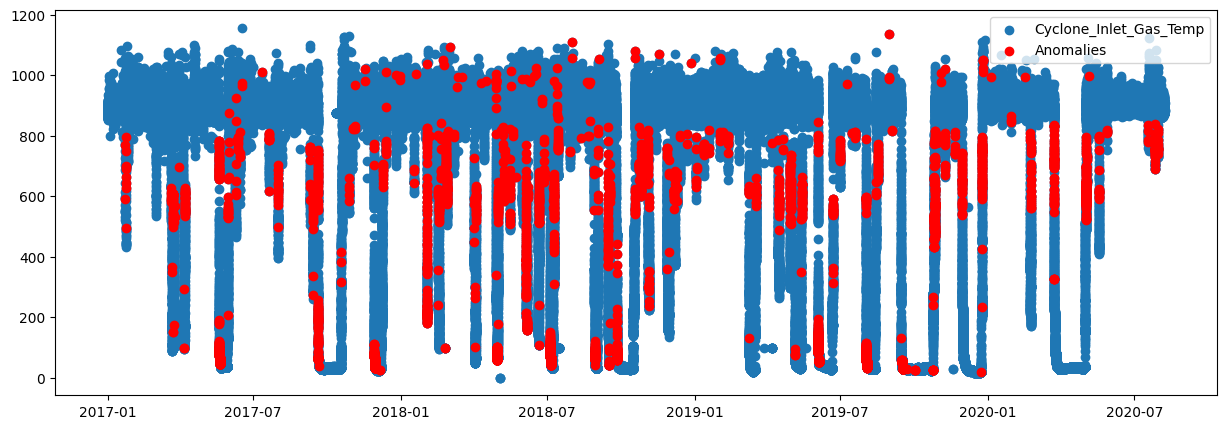

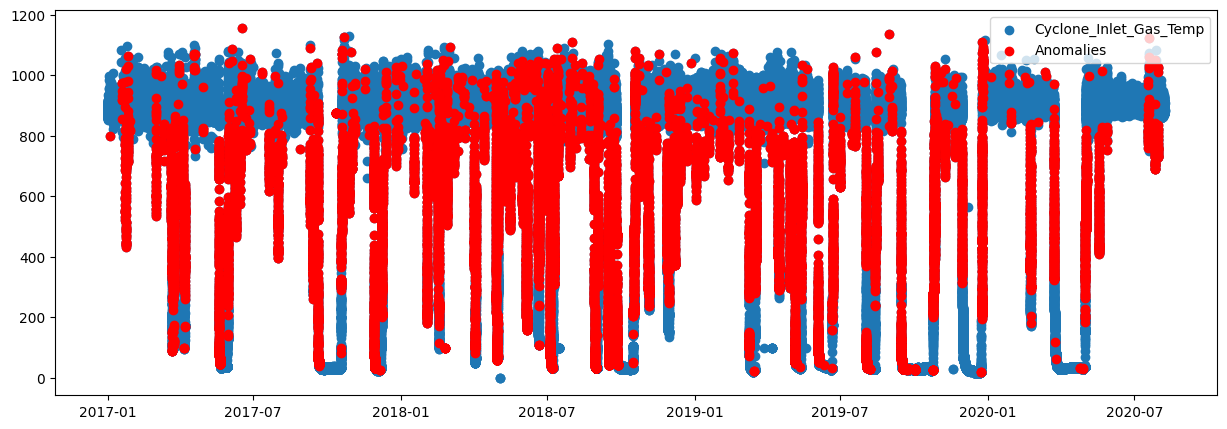

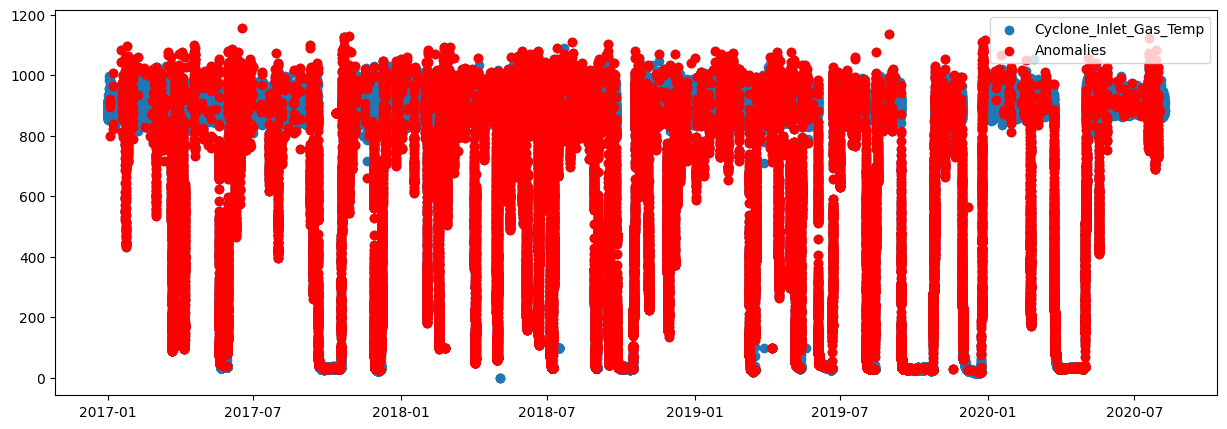

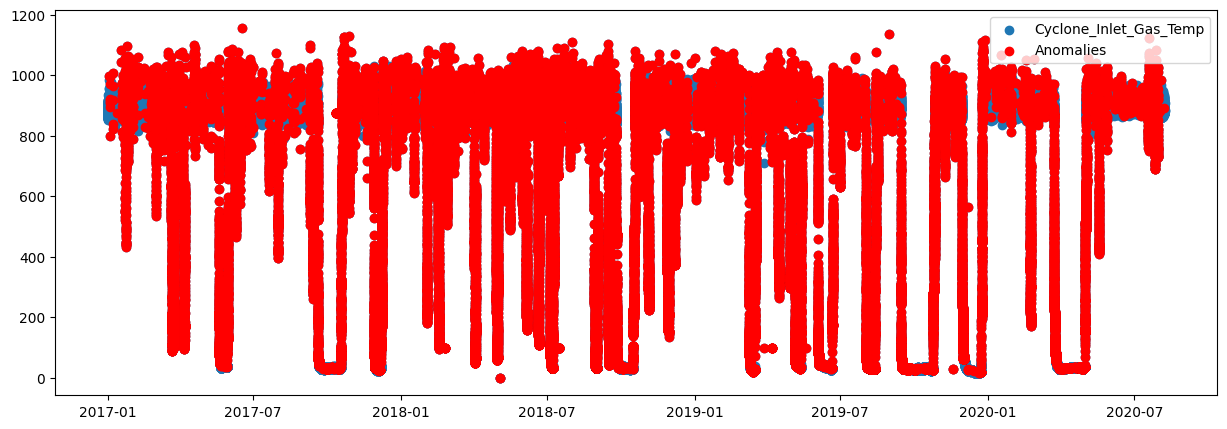

In [ ]:
# Plot the Anomaly using Scatter Plot
for df,anomaly in zip(dfs,anomalies):
  plt.figure(figsize=(15,5))
  plt.scatter(df.index,
              df['Cyclone_Inlet_Gas_Temp'],
              label="Cyclone_Inlet_Gas_Temp")
  plt.scatter(anomaly.index,
              anomaly['Cyclone_Inlet_Gas_Temp'],
              color='red',
              label="Anomalies")
  plt.legend()
  plt.show()